# Phys 404-Spring 2021
## Homework 5- Graduate Example attempt

### Graduate student:
Write your own Runge-Kutta scheme to calculate the orbit of two equal mass binary.
The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are separated by a distance of 1 initially. Initialize the binary velocity so that each binary star will have an eccentricity of 0. Evolve this system to 100 binary orbits, and plot their orbits in the x-y plane. 

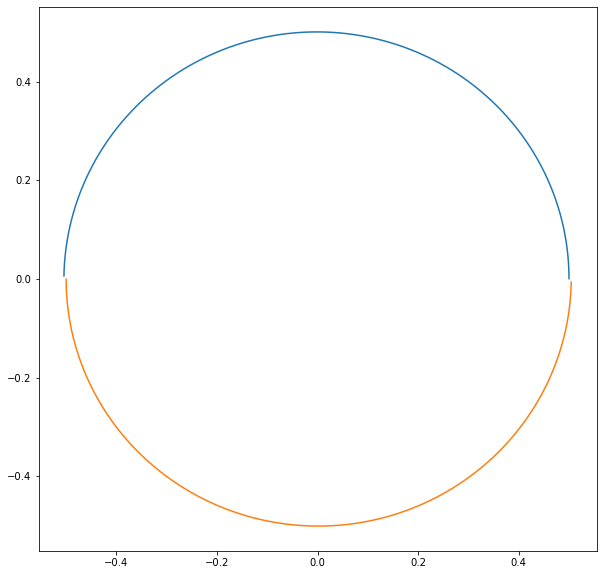

In [10]:
# So we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
from numba import jit

G=1.
M1=1.
M2=1.
tend=0.5*np.sqrt(2)*np.pi
h=0.001

x0_1 = .5
x0_2 = -.5
vx_1 = -0#.7035
vx_2 = 0#.7035
y0_1 = 0.
y0_2 =-0.
vy_1 = 1/np.sqrt(2)#0.7034
vy_2 = -1/np.sqrt(2)#-0.7034
z0_1 = 0.
z0_2 = 0.
vz_1 = 0.
vz_2 = 0.

#    0     1     2     3     4     5     6     7     8     9    10    11
s=[x0_1, vx_1, y0_1, vy_1, z0_1, vz_1, x0_2, vx_2, y0_2, vy_2, z0_2, vz_2]
t=0

@jit(forceobj=True)
def f(t, y):
    f=np.zeros(12)
    r=np.sqrt((s[0]-s[6])*(s[0]-s[6]) + 
              (s[2]-s[8])*(s[2]-s[8]) + 
              (s[4]-s[10])*(s[4]-s[10]))
    
    f[0]=s[1]
    f[1]=-G*M2/r/r/r*(s[0]-s[6])
    f[2]=s[3]
    f[3]=-G*M2/r/r/r*(s[2]-s[8])
    f[4]=s[5]
    f[5]=-G*M2/r/r/r*(s[4]-s[10])
    f[6]=s[7]
    f[7]=-G*M1/r/r/r*(s[6]-s[0])
    f[8]=s[9]
    f[9]=-G*M1/r/r/r*(s[8]-s[2])
    f[10]=s[11]
    f[11]=-G*M1/r/r/r*(s[10]-s[4])
    return f

@jit(forceobj=True)
def rk4(t, h, s, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,s)
    k2=h*f(t+0.5*h,s+0.5*k1)
    k3=h*f(t+0.5*h,s+0.5*k2)
    k4=h*f(t+h,s+k3)
    s+=(k1+2*(k2+k3)+k4)/6.
    return s

x1p=[]
y1p=[]
z1p=[]
x2p=[]
y2p=[]
z2p=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    s = rk4(t,h,s,12)
    x1p=np.append(x1p,s[0])
    y1p=np.append(y1p,s[2])
    z1p=np.append(z1p,s[4])
    x2p=np.append(x2p,s[6])
    y2p=np.append(y2p,s[8])
    z2p=np.append(z2p,s[10])
    t = t+h

plt.plot(x1p,y1p)
plt.plot(x2p,y2p)
plt.show()